<a href="https://colab.research.google.com/github/somkuwaryash/PersonalPortfolioPage_Somkuwar/blob/master/LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


SIMPLE LINEAR REGRESSION

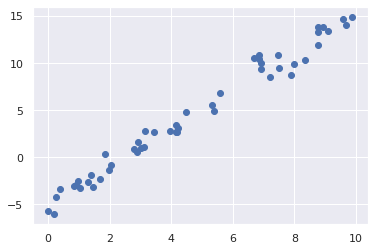

In [ ]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = 2*x-5+rng.randn(50)
plt.scatter(x,y);

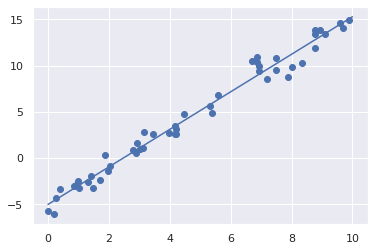

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

model.fit(x[:, np.newaxis],y)

xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit);

In [ ]:
model.coef_

array([2.02720881])

In [ ]:
model.intercept_

-4.998577085553204

In [ ]:
rng = np.random.RandomState(1)
x = 10*rng.rand(100,3)
y = 0.5+np.dot(x,[1.5,-2,1])

model.fit(x,y)
print(model.intercept_)
print(model.coef_)

0.50000000000001
[ 1.5 -2.   1. ]


polynomial basis function

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x=np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [ ]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

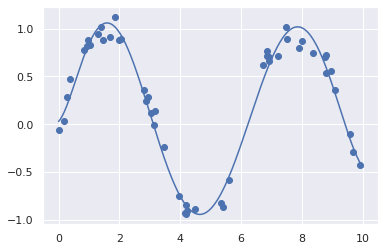

In [ ]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)
y = np.sin(x)+0.1*rng.randn(50)

poly_model.fit(x[:,np.newaxis],y)
yfit = poly_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)

gaussian basis functions

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseException, TransformerMixin):
  """uniformly spaced Gaussian features for one-dimensional input"""
  def __init__(self, N, width_factor=2.0):
    self.N = N
    self.width_factor = width_factor

  def _gauss_basis(x, y, width, axis=None):
    arg = (x-y)/width
    return np.exp(-0.5*np.sum(arg**2,axis))
  
  def fit(self, X, y=None):
    #create N centers spread along the data range
    self.centers_ = np.linspace(X.min(),X.max(),self.N)
    self.width_ = self.width_factor*(self.centers_[1]-self.centers_[0])
    return self

  def transform(self, X):
    return self._gauss_basis(X[:,:,np.newaxis], self.centers_,self.width_,axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())

gauss_model.fit(x[:,np.newaxis],y)
yfit = gauss_model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit)
plt.xlim(0,10);

TypeError: ignored